## Exp1 - Step Response

In [1]:
# %cd /home/gabriel/kdr
import numpy as np
import matplotlib.pyplot as plt
# import cv2

from differential_robot import DifferentialRobot

# %matplotlib inline

### Simulation details

In [2]:
sample_time = 0.001 # [s]
simulation_time = 20 # [s]
simulation_steps = int(simulation_time / sample_time)

### Inputs signal

In [11]:
signal_a_left = [0.8 for _ in range(simulation_steps)]
signal_a_right = [0.7 for _ in range(simulation_steps)]

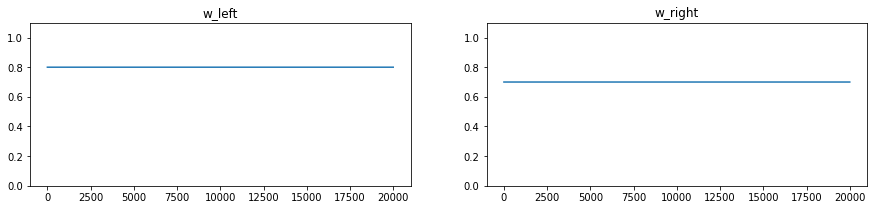

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
ax1.set_ylim((0,1.1))
ax1.set_title("w_left")
ax1.plot(range(simulation_steps), signal_a_left)

ax2.set_ylim((0,1.1))
ax2.set_title("w_right")
ax2.plot(range(simulation_steps), signal_a_right)
plt.show()

### Simulation

In [13]:
robot = DifferentialRobot(0, 0, 0, sample_time, 0.025, 0.01, 1.2, 1)
path = []
for w_left, w_right in zip(signal_a_left, signal_a_right):
    
    robot.step_acc(w_left, w_right)
    state = robot.state()
    
    path.append(state)

In [14]:
path = np.array(path)

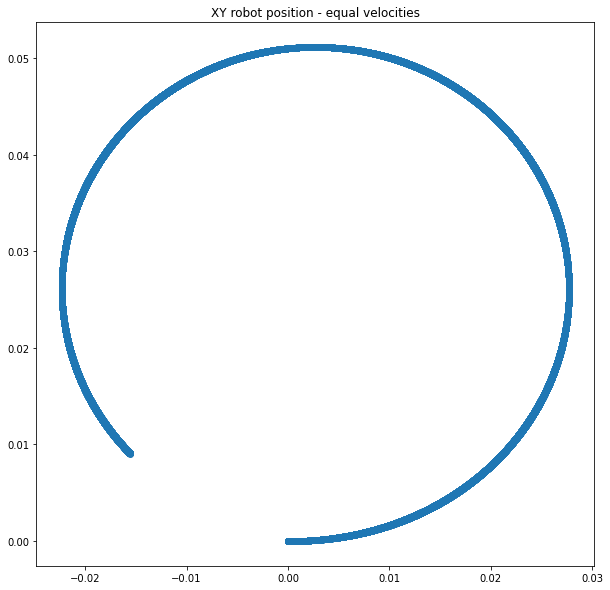

In [15]:
plt.figure(figsize=(10, 10))
plt.title('XY robot position - equal velocities')
#plt.ylim(-0.2, 1)
#plt.xlim(-0.2, 1)
plt.scatter(path[:,0], path[:,1])
plt.show()